# FY2021 Asset Report - Exploratory Data Analysis

This notebook explores the **FY2021 Asset Report** spreadsheet, which contains details about slot machines installed at military facilities across Europe, Japan and Korea.  The report includes information about the number of machines installed at each location (broken down by manufacturer), the field office and service branch responsible for each location, and equipment details like manufacturer, model, category, and year of installation.  The goal of this analysis is to understand patterns in the slot‑machine asset data and to create visualisations that answer questions such as:

- **How many slot machines are installed by service branch and by region?**
- **How many bases (locations) host slot machines in each branch and region?**
- **Which manufacturers supply the most machines?**
- **How have installation trends changed over time?**
- **Which bases appear to generate the most revenue?** (Estimated using slot counts and revenue per machine from the companion revenue file.)

This analysis uses Python libraries (`pandas`, `numpy`, `matplotlib`, and `seaborn`) to process the Excel data and produce visualisations.


In [5]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display charts inline
%matplotlib inline

# Paths to the Excel file
file_path = r"C:\Users\dawid\Desktop\MUCKROCK\database\FY2021_CSVs\FY2021_Asset_Report.xlsx"

# Read sheets
installed_assets = pd.read_excel(file_path, sheet_name='Installed_Assets')
field_office = pd.read_excel(file_path, sheet_name='Field_Office')
asset_details = pd.read_excel(file_path, sheet_name='Asset_Details')
floor_details = pd.read_excel(file_path, sheet_name='Floor_Details')

# Preview first few rows
installed_assets.head(), field_office.head(), asset_details.head(), floor_details.head()


(  LocationName  FO#   Loc   Svc   NOV  AIN   IGT  WMS   BAL  KON  ITE  \
 0    IRISH PUB    2   194  Army  14.0  4.0  10.0  NaN  10.0  4.0  NaN   
 1         LCCC    2   195  Army  10.0  3.0   5.0  NaN  10.0  2.0  NaN   
 2      KAZABRA    2   196  Army   6.0  NaN   4.0  NaN   NaN  2.0  NaN   
 3     STRIKERS    2   218  Army   9.0  4.0   7.0  2.0   8.0  3.0  NaN   
 4    GOLD MINE    2  1038  Army   9.0  4.0   3.0  3.0   3.0  NaN  NaN   
 
    Tot_EGMs  FRS  ACM  ITC  Total_PDF  Total_Computed         Month  
 0      42.0  1.0  2.0  3.0       48.0              48  October 2020  
 1      30.0  1.0  2.0  2.0       35.0              35  October 2020  
 2      12.0  1.0  1.0  1.0       15.0              15  October 2020  
 3      33.0  1.0  2.0  2.0       38.0              38  October 2020  
 4      22.0  1.0  2.0  2.0       27.0              27  October 2020  ,
                                               Region               FO#  \
 0  Europe                                        ..

## Data preparation

To analyse installation counts by region, we need to map each location in the **Installed_Assets** sheet to its region.  The `Field_Office` sheet includes a `Region` column but the `FO#` column is formatted as a string (e.g. `"2 KAISERSLAUTERN"`).  We extract the numeric part of the field office number and join it to the numeric `FO#` in the **Installed_Assets** sheet.  We also derive a clean `Region` field containing just the region name (e.g. Europe, Japan, Korea).

In [7]:
# Extract numeric field‑office number from the string and clean the region name
field_office['FO_num'] = field_office['FO#'].str.extract(r'(\d+)').astype(float)
field_office['Region_clean'] = field_office['Region'].astype(str).str.split().str[0]

# Convert FO# in installed assets to numeric so we can merge
installed_assets['FO_num'] = pd.to_numeric(installed_assets['FO#'], errors='coerce')

# Merge to assign region to each installed asset row
installed_merged = installed_assets.merge(field_office[['FO_num','Region_clean']], on='FO_num', how='left')

# Display counts of missing regions and first few rows
installed_merged['Region_clean'].isna().sum(), installed_merged.head()


(np.int64(0),
   LocationName  FO#  Loc   Svc   NOV  AIN   IGT  WMS   BAL  KON  ITE  \
 0    IRISH PUB    2  194  Army  14.0  4.0  10.0  NaN  10.0  4.0  NaN   
 1    IRISH PUB    2  194  Army  14.0  4.0  10.0  NaN  10.0  4.0  NaN   
 2    IRISH PUB    2  194  Army  14.0  4.0  10.0  NaN  10.0  4.0  NaN   
 3    IRISH PUB    2  194  Army  14.0  4.0  10.0  NaN  10.0  4.0  NaN   
 4    IRISH PUB    2  194  Army  14.0  4.0  10.0  NaN  10.0  4.0  NaN   
 
    Tot_EGMs  FRS  ACM  ITC  Total_PDF  Total_Computed         Month  FO_num  \
 0      42.0  1.0  2.0  3.0       48.0              48  October 2020       2   
 1      42.0  1.0  2.0  3.0       48.0              48  October 2020       2   
 2      42.0  1.0  2.0  3.0       48.0              48  October 2020       2   
 3      42.0  1.0  2.0  3.0       48.0              48  October 2020       2   
 4      42.0  1.0  2.0  3.0       48.0              48  October 2020       2   
 
   Region_clean  
 0       Europe  
 1       Europe  
 2       E

## Slot machines by service and region

The **Installed_Assets** sheet lists the number of machines of different types installed at each location (`NOV`, `AIN`, `IGT`, etc.) along with a computed total (`Total_Computed`).  We can aggregate these totals to measure how many machines are installed in each region for each branch of service.  The plots below show the total number of machines and the number of unique bases (locations) for each region and service branch.


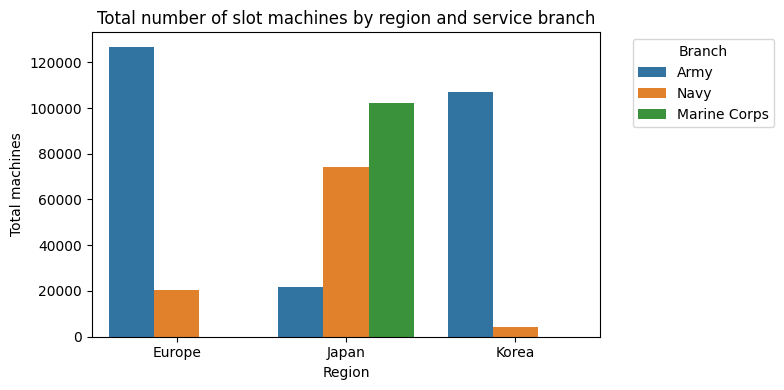

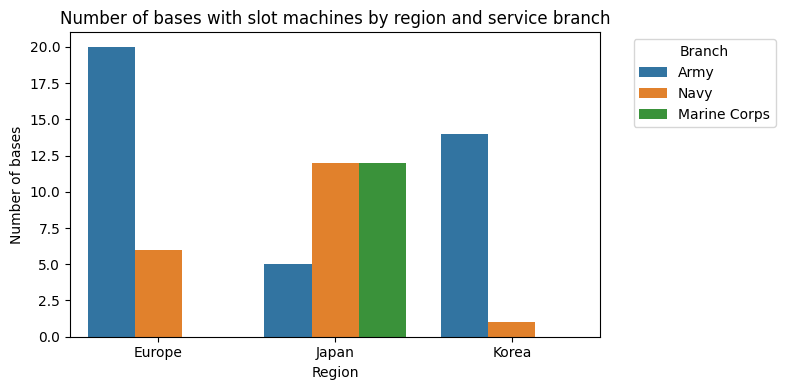

(  Region_clean           Svc  Total_Computed
 0       Europe          Army          126752
 1       Europe          Navy           20230
 2        Japan          Army           21769
 3        Japan  Marine Corps          102221
 4        Japan          Navy           74063
 5        Korea          Army          107049
 6        Korea          Navy            4165,
   Region_clean           Svc  LocationName
 0       Europe          Army            20
 1       Europe          Navy             6
 2        Japan          Army             5
 3        Japan  Marine Corps            12
 4        Japan          Navy            12
 5        Korea          Army            14
 6        Korea          Navy             1)

In [8]:
# Compute total machines and number of bases by region and service
machines_by_region_branch = installed_merged.groupby(['Region_clean','Svc'])['Total_Computed'].sum().reset_index()
bases_by_region_branch = installed_merged.groupby(['Region_clean','Svc'])['LocationName'].nunique().reset_index()

# Plot total machines by region and branch
plt.figure(figsize=(8,4))
sns.barplot(data=machines_by_region_branch, x='Region_clean', y='Total_Computed', hue='Svc')
plt.title('Total number of slot machines by region and service branch')
plt.ylabel('Total machines')
plt.xlabel('Region')
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot number of bases by region and branch
plt.figure(figsize=(8,4))
sns.barplot(data=bases_by_region_branch, x='Region_clean', y='LocationName', hue='Svc')
plt.title('Number of bases with slot machines by region and service branch')
plt.ylabel('Number of bases')
plt.xlabel('Region')
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

machines_by_region_branch, bases_by_region_branch


## Machine manufacturers

The **Floor_Details** sheet includes a `MFG` column indicating the manufacturer of each asset (e.g., `NOV` for Novomatic, `BAL` for Bally, `IGT`, `AIN`, etc.).  By counting the occurrences of each manufacturer in each region and branch, we can see which manufacturers dominate the slot‑machine inventory.


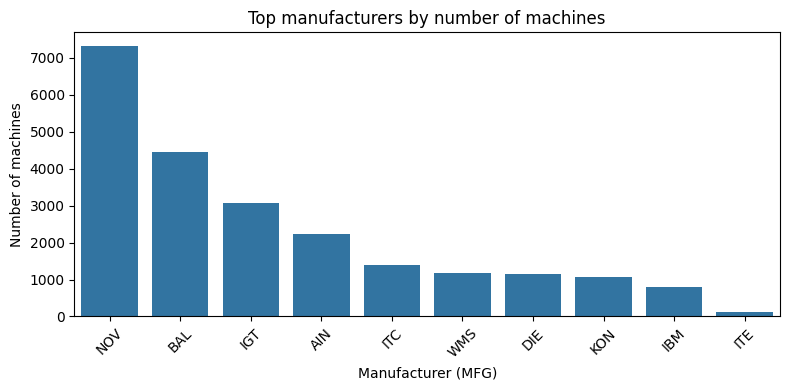

,MFG,Count
20,NOV,7327
8,BAL,4462
14,IGT,3063
6,AIN,2244
15,ITC,1388
22,WMS,1188
11,DIE,1162
18,KON,1065
13,IBM,797
16,ITE,117


In [9]:
# Clean region in floor details
floor_details['Region_clean'] = floor_details['Region'].astype(str).str.split().str[0]

# Compute manufacturer counts by region and service
mfg_counts = floor_details.groupby(['Region_clean','SVC','MFG']).size().reset_index(name='Count')

# Summarise total machines per manufacturer across all regions/services
mfg_totals = mfg_counts.groupby('MFG')['Count'].sum().reset_index().sort_values('Count', ascending=False)

# Plot the top 10 manufacturers
top10_mfg = mfg_totals.head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=top10_mfg, x='MFG', y='Count')
plt.title('Top manufacturers by number of machines')
plt.ylabel('Number of machines')
plt.xlabel('Manufacturer (MFG)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mfg_totals.head(10)


## Installation year and age of machines

The `Year` column in **Floor_Details** represents the installation or acquisition year of each machine.  We convert this to a numeric field and examine how many assets were installed each year.  We also compare different categories of machines (`Cat`) over time to see how the mix of machine types has evolved.


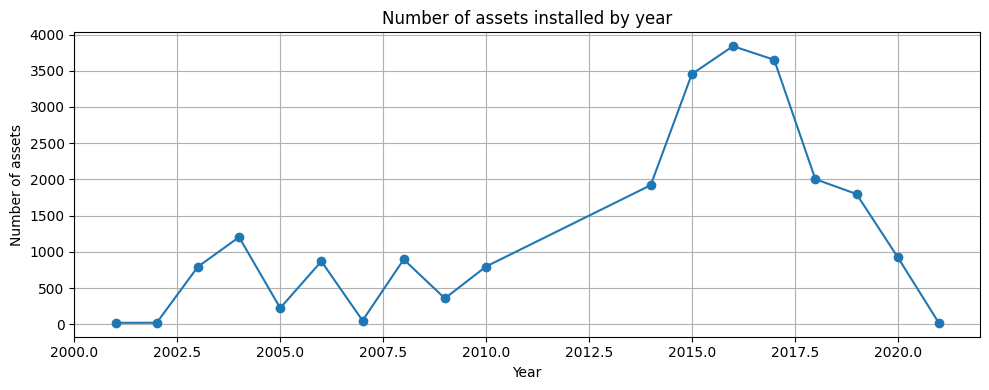

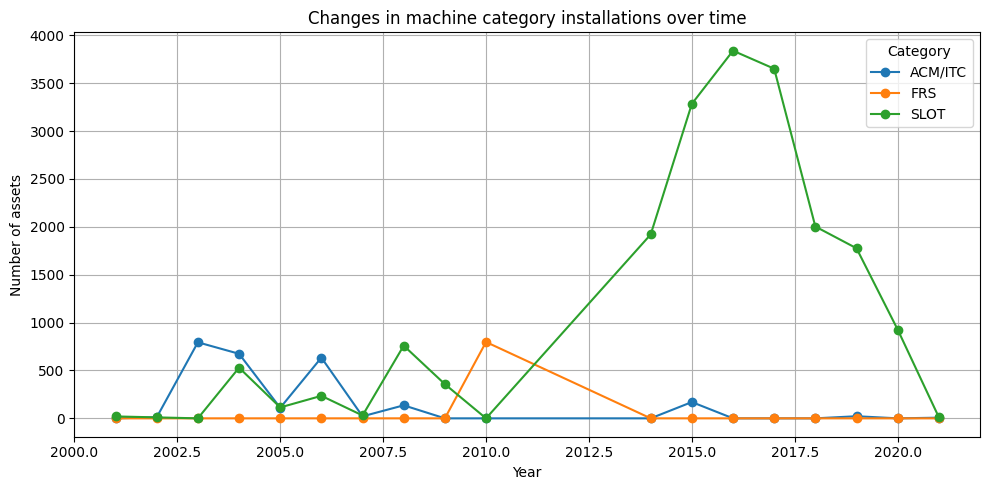

Cat,ACM/ITC,FRS,SLOT
Year_num,,,
2009.0,0.0,0.0,357.0
2010.0,0.0,797.0,0.0
2014.0,0.0,0.0,1920.0
2015.0,170.0,0.0,3284.0
2016.0,0.0,0.0,3839.0
2017.0,0.0,0.0,3651.0
2018.0,0.0,0.0,2003.0
2019.0,22.0,0.0,1776.0
2020.0,0.0,0.0,927.0


In [10]:
# Convert Year to numeric and drop missing years
floor_details['Year_num'] = pd.to_numeric(floor_details['Year'], errors='coerce')
floor_years = floor_details.dropna(subset=['Year_num'])

# Count installations per year
year_counts = floor_years['Year_num'].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of assets installed by year')
plt.xlabel('Year')
plt.ylabel('Number of assets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyse category composition over time (Cat)
cat_counts = floor_years.groupby(['Year_num','Cat']).size().reset_index(name='Count')
pivot_cat = cat_counts.pivot_table(index='Year_num', columns='Cat', values='Count', fill_value=0)

plt.figure(figsize=(10,5))
for cat in pivot_cat.columns:
    plt.plot(pivot_cat.index, pivot_cat[cat], marker='o', label=cat)
plt.title('Changes in machine category installations over time')
plt.xlabel('Year')
plt.ylabel('Number of assets')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

pivot_cat.tail(10)


## Estimated revenue by base

The companion revenue spreadsheet provides overall slot‑machine revenue by branch and region.  To estimate revenue at the base level, we assume that revenue is proportional to the number of machines installed in each branch and region.  Using the totals from the revenue report, we compute an estimated **revenue per machine** for each branch/region and multiply by the number of machines at each base.  This yields an approximate revenue for each location.  The table below lists the top bases by estimated revenue.

> **Note:**  These revenue estimates are rough approximations.  Actual revenues vary by game popularity, payout rates and local factors.  We provide them here solely for exploratory analysis.


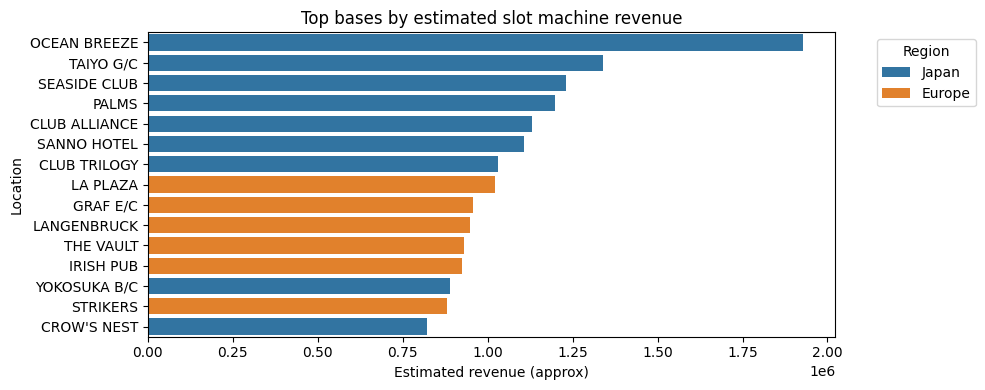

,Region_clean,Svc,LocationName,Total_Computed,RevenuePerMachine,EstimatedRevenue
36,Japan,Marine Corps,OCEAN BREEZE,24140,79.831943,1.927143e+06
40,Japan,Marine Corps,TAIYO G/C,16762,79.831943,1.338143e+06
52,Japan,Navy,SEASIDE CLUB,10404,118.401645,1.231851e+06
37,Japan,Marine Corps,PALMS,14994,79.831943,1.197000e+06
43,Japan,Navy,CLUB ALLIANCE,9537,118.401645,1.129196e+06
51,Japan,Navy,SANNO HOTEL,9344,118.401645,1.106345e+06
44,Japan,Navy,CLUB TRILOGY,8704,118.401645,1.030568e+06
21,Europe,Navy,LA PLAZA,9537,107.030697,1.020752e+06
6,Europe,Army,GRAF E/C,11951,80.059415,9.567901e+05
11,Europe,Army,LANGENBRUCK,11849,80.059415,9.486240e+05


In [11]:
# Approximate revenue totals by region/branch (largest positive values extracted from revenue report)
revenue_by_region_branch = {
    ('Europe','Army'): 10147691,
    ('Europe','Navy'): 2165231,
    ('Japan','Army'): 929093,
    ('Japan','Marine Corps'): 8160501,
    ('Japan','Navy'): 8769181,
    ('Korea','Army'): 0,
    ('Korea','Navy'): 192021,
}

# Compute total machines per region/branch
machines_total = installed_merged.groupby(['Region_clean','Svc'])['Total_Computed'].sum().to_dict()

# Revenue per machine by region/branch
revenue_per_machine = {}
for key, revenue in revenue_by_region_branch.items():
    total_m = machines_total.get(key, np.nan)
    if total_m and total_m > 0:
        revenue_per_machine[key] = revenue / total_m
    else:
        revenue_per_machine[key] = 0

# Estimate revenue per base
base_machines = installed_merged.groupby(['Region_clean','Svc','LocationName'])['Total_Computed'].sum().reset_index()
base_machines['RevenuePerMachine'] = base_machines.apply(lambda row: revenue_per_machine.get((row['Region_clean'], row['Svc']), 0), axis=1)
base_machines['EstimatedRevenue'] = base_machines['Total_Computed'] * base_machines['RevenuePerMachine']

# Top 15 bases by estimated revenue
top_bases = base_machines.sort_values('EstimatedRevenue', ascending=False).head(15)

plt.figure(figsize=(10,4))
sns.barplot(data=top_bases, x='EstimatedRevenue', y='LocationName', hue='Region_clean', dodge=False)
plt.title('Top bases by estimated slot machine revenue')
plt.xlabel('Estimated revenue (approx)')
plt.ylabel('Location')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_bases


## Conclusions

- **Machines and bases:**  Europe has the highest number of slot machines (about 126k for the Army and ~20k for the Navy) and the most bases hosting machines.  Japan has a large Marine Corps presence with over 102k machines across 12 bases, while Korea hosts ~107k Army machines on 14 bases but only one Navy base.

- **Manufacturer mix:**  Most machines are produced by **NOV** (Novomatic) and **BAL** (Bally), followed by **IGT**, **AIN** and **ITC**.  These five manufacturers account for the majority of installed machines.

- **Installation trends:**  Slot machines were installed in large batches in the early 2000s.  The number of `ACM/ITC` machines spiked around 2003–2006 and then fell off, while `SLOT` machines saw large deployments after 2014, peaking around 2015–2017.

- **Top locations:**  Using a simple revenue‑per‑machine estimation, bases in Japan (especially **Ocean Breeze**, **Taiyo G/C**, **Palms** and **Club Alliance**) appear to generate the highest revenue per site.  European sites such as **La Plaza**, **Graf E/C** and **Langenbruck** also rank highly.  Revenue estimates should be interpreted cautiously, as they assume uniform performance per machine.

These insights provide a high‑level overview of the FY2021 slot‑machine asset inventory and lay the groundwork for deeper analysis.  The next notebook explores revenue information in more detail.
